## Computer Vision Guide (Demonstration of various filters for Image Preprocessing)
### AIM - To apply and analyze the effects of Gaussian, Sobel, and Median filters on digital images, demonstrating their respective functionalities in noise reduction, edge detection, and noise removal.

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

In [25]:
image_path = "C:/Users/cw/Downloads/Notebook.jpg" 
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

In [26]:
# Convert BGR to RGB for visualization
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [27]:
noisy_image = random_noise(image, mode='s&p', amount=0.1)  # 'amount' controls noise density and 's&p'(salt and pepper) is mode of noise
noisy_image = (noisy_image * 255).astype('uint8') 

In [28]:
image = cv2.resize(image, (500, 500))
gaussian = cv2.GaussianBlur(image, (5, 5), 0)

In [29]:
median = cv2.medianBlur(noisy_image, 5)

In [30]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))

In [31]:
# cv2.imshow("Original Image", image)
# cv2.imshow("Gaussian Blur", gaussian)
# cv2.imshow("Median Blur", median)
# cv2.imshow("Sobel Combined", sobel_combined)

In [32]:
images = [image, noisy_image , gaussian, median , sobel_combined]
titles = ["Original Image","Noisy Image", "Guassian Filter", "Median Filter", "Sobel Filter"]

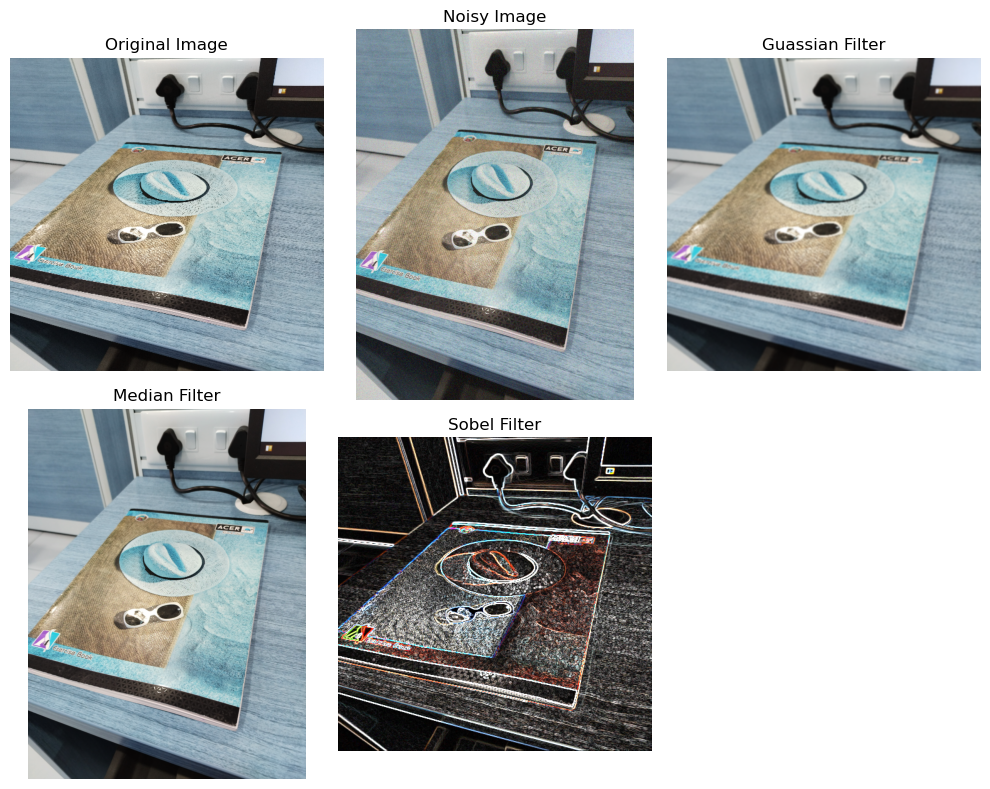

In [33]:
plt.figure(figsize=(10, 8))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)  
    plt.axis('off')
    plt.title(title)

plt.tight_layout()
plt.show()

#### Conclusion : In this practical , I have successfully implemented noise reduction , edge detection , and noise removal using Guassian , Sobel and Median filters respectively.

#### Some other filters

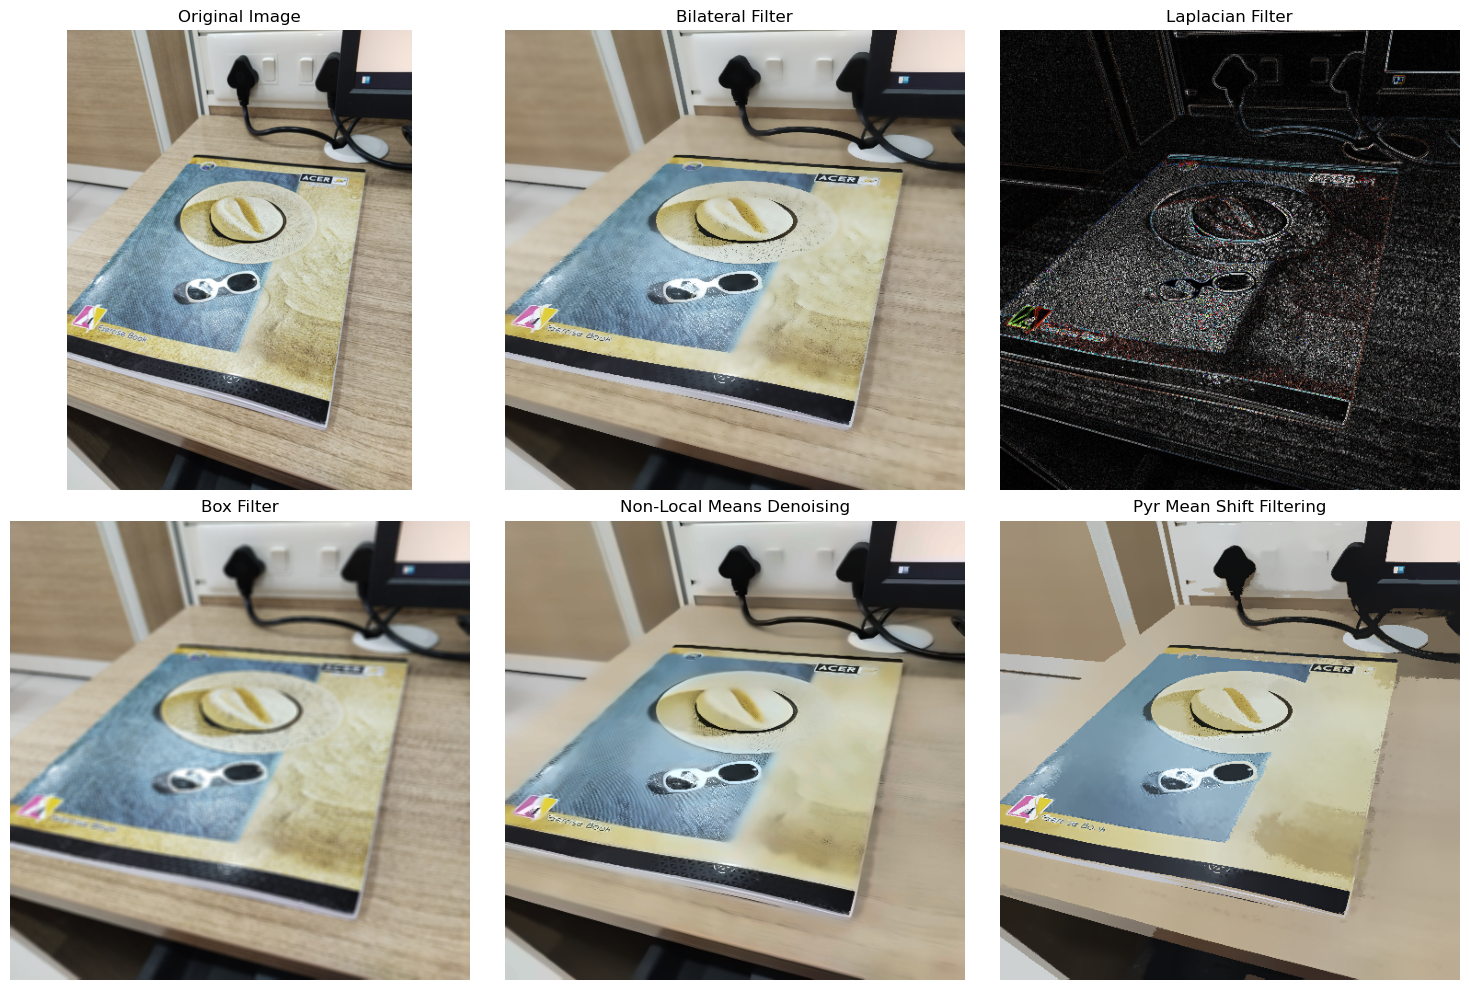

In [34]:
# 1. Bilateral Filter
bilateral_filtered = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

# 2. Laplacian Filter
laplacian_filtered = cv2.Laplacian(image, cv2.CV_64F)
laplacian_filtered = np.uint8(np.absolute(laplacian_filtered))  # Convert to uint8

# 3. Box Filter
box_filtered = cv2.boxFilter(image, ddepth=-1, ksize=(5, 5))

# 4. Non-Local Means Denoising
nlm_denoised = cv2.fastNlMeansDenoisingColored(image, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)

# 5. Pyramid Mean Shift Filtering
pyr_mean_shift_filtered = cv2.pyrMeanShiftFiltering(image, sp=20, sr=40)

# Plot all the results
titles = ['Original Image', 'Bilateral Filter', 'Laplacian Filter', 
          'Box Filter', 'Non-Local Means Denoising', 'Pyr Mean Shift Filtering']
images = [image_rgb, 
          cv2.cvtColor(bilateral_filtered, cv2.COLOR_BGR2RGB),
          laplacian_filtered, 
          cv2.cvtColor(box_filtered, cv2.COLOR_BGR2RGB),
          cv2.cvtColor(nlm_denoised, cv2.COLOR_BGR2RGB),
          cv2.cvtColor(pyr_mean_shift_filtered, cv2.COLOR_BGR2RGB)]

plt.figure(figsize=(15, 10))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()